In [2]:
import numpy as np
import keras.backend as K
import tensorflow as tf
import operator
from tensorflow import keras
from keras.utils import np_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape, Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics.pairwise import cosine_distances

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors as nn
from matplotlib import pylab
import pandas as pd

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
import keras.backend as K

In [1]:
def cbow_model(vocab_size, embedding_dim, window_size):
    cbow = Sequential()
    cbow.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=window_size*2))#embeddings_initializer='glorot_uniform'
    cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embedding_dim,)))
    cbow.add(Dense(vocab_size, activation='softmax'))#kernel_initializer='glorot_uniform'
    cbow.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #cbow.compile(optimizer=keras.optimizers.Adam(),loss='categorical_crossentropy', metrics=['accuracy'])
    return cbow

In [4]:
file_name = 'ALICE.txt'
corpus = open(file_name).readlines()

In [5]:
# Remove sentences with fewer than 3 words
corpus = [sentence for sentence in corpus if sentence.count(" ") >= 2]

# Remove punctuation in text and fit tokenizer on entire corpus
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n'+"'")
tokenizer.fit_on_texts(corpus)

# Convert text to sequence of integer values
corpus = tokenizer.texts_to_sequences(corpus)
n_samples = sum(len(s) for s in corpus) # Total number of words in the corpus
V = len(tokenizer.word_index) + 1 # Total number of unique words in the corpus

n_samples, V

(27165, 2557)

In [21]:
file_name = 'ALICE.txt'
corpus_lst = open(file_name).readlines()
# Remove sentences with fewer than 3 words
corpus_lst = [sentence for sentence in corpus_lst if sentence.count(" ") >= 2]

In [6]:
# Parameters
window_size = 2 
window_size_corpus = window_size*2

# Set numpy seed for reproducible results
np.random.seed(42)

In [7]:
cbow_model = cbow_model(vocab_size = V, embedding_dim = 100 , window_size = window_size)

In [8]:
cbow_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            255700    
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense (Dense)               (None, 2557)              258257    
                                                                 
Total params: 513,957
Trainable params: 513,957
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.preprocessing import sequence

# Prepare the data for the CBOW model
def generate_data_cbow(corpus, window_size, V):
    all_in = []
    all_out = []

    # Iterate over all sentences
    for sentence in corpus:
        L = len(sentence)
        for index, word in enumerate(sentence):
            start = index - window_size
            end = index + window_size + 1

            # Empty list which will store the context words
            context_words = []
            for i in range(start, end):
                # Skip the 'same' word
                if i != index:
                    # Add a word as a context word if it is within the window size
                    if 0 <= i < L:
                        context_words.append(sentence[i])
                    else:
                        # Pad with zero if there are no words 
                        context_words.append(0)
            # Append the list with context words
            all_in.append(context_words)

            # Add one-hot encoding of the target word
            all_out.append(to_categorical(word, V))
                 
    return (np.array(all_in), np.array(all_out))

In [10]:
# Create the training data
X_cbow, y_cbow = generate_data_cbow(corpus, window_size, V)
X_cbow.shape, y_cbow.shape

((27165, 4), (27165, 2557))

In [11]:
history = cbow_model.fit(X_cbow, y_cbow, batch_size=64, epochs=50, verbose=2)

Epoch 1/50
425/425 - 3s - loss: 6.6927 - accuracy: 0.0586 - 3s/epoch - 8ms/step
Epoch 2/50
425/425 - 3s - loss: 5.9843 - accuracy: 0.0606 - 3s/epoch - 7ms/step
Epoch 3/50
425/425 - 3s - loss: 5.8220 - accuracy: 0.0685 - 3s/epoch - 7ms/step
Epoch 4/50
425/425 - 3s - loss: 5.6421 - accuracy: 0.0882 - 3s/epoch - 8ms/step
Epoch 5/50
425/425 - 3s - loss: 5.4713 - accuracy: 0.1061 - 3s/epoch - 8ms/step
Epoch 6/50
425/425 - 3s - loss: 5.3041 - accuracy: 0.1266 - 3s/epoch - 7ms/step
Epoch 7/50
425/425 - 3s - loss: 5.1350 - accuracy: 0.1472 - 3s/epoch - 7ms/step
Epoch 8/50
425/425 - 3s - loss: 4.9702 - accuracy: 0.1650 - 3s/epoch - 8ms/step
Epoch 9/50
425/425 - 4s - loss: 4.8141 - accuracy: 0.1785 - 4s/epoch - 9ms/step
Epoch 10/50
425/425 - 3s - loss: 4.6664 - accuracy: 0.1911 - 3s/epoch - 7ms/step
Epoch 11/50
425/425 - 4s - loss: 4.5271 - accuracy: 0.2056 - 4s/epoch - 9ms/step
Epoch 12/50
425/425 - 4s - loss: 4.3947 - accuracy: 0.2175 - 4s/epoch - 10ms/step
Epoch 13/50
425/425 - 4s - loss: 4.2

In [12]:
V

2557

In [37]:
def unique_words(words_list):
    unique_words = set()
    for word in words_list:
        unique_words.add(word)
    return list(unique_words)

In [38]:
all_words =" ".join(corpus_lst).split()

In [43]:
vocab = unique_words(all_words)

In [ ]:


# Define the vocabulary and the corpus
vocabulary = ["the", "cat", "sat", "on", "mat"]

# Create a dictionary mapping words to indices
word_index = {word: i for i, word in enumerate(vocabulary)}

# Create a dictionary mapping indices to words
reverse_word_index = {i: word for word, i in word_index.items()}

# Define the window size
window_size = 3

In [ ]:
context = ["the", "icelike", "crasher", "flanch", "reaction", "frowzily"]
context_indices = [word_index[word] for word in context]
x = np.array(context_indices).reshape(1, window_size*2)

In [ ]:
# Use the model to make a prediction
prediction = model.predict(x)

# Convert the prediction to a word
predicted_word = reverse_word_index[np.argmax(prediction)]
print(predicted_word)

In [14]:
import matplotlib.pyplot as plt

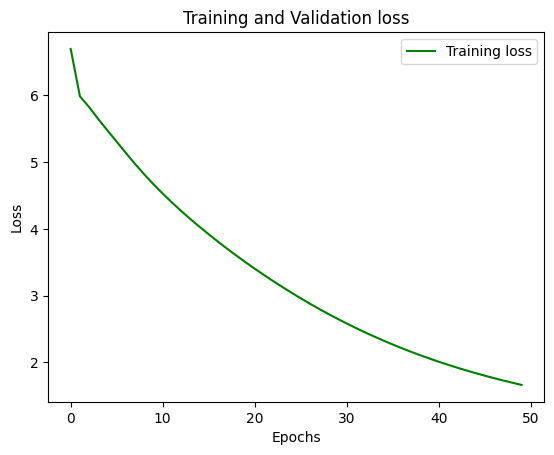

In [20]:
loss_train = history.history['loss']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()